In [11]:
import pandas as pd
import numpy as np


In [12]:
init_notebook_mode(connected=True)

In [13]:
df=pd.read_csv('E:/Hacka/train (1)/train/match_data.csv') # reading data

In [14]:
df_rcb=df[df.team1_id=='RCB'] 
df_rcb_2=df[df.team2_id=='RCB']
df=pd.concat([df_rcb,df_rcb_2]) #All the matches RCB played 

In [15]:
#to find the season wise wins of RCB
import sys
wins=[]
season=[]
for i in range(2008,2018):
    seasonwisewins=df[df.season==i]
    season.append(i)
    wins.append(len(seasonwisewins[df.winner=='RCB']))

C:\Users\Mayank\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [16]:
dictionary = dict(zip(season, wins))

In [17]:
dictionary #this dictionary gives us number of matches won by RCB in each season

{2008: 4,
 2009: 9,
 2010: 8,
 2011: 10,
 2012: 8,
 2013: 9,
 2014: 5,
 2015: 8,
 2016: 9,
 2017: 3}

In [18]:
season=list(map(str,season)) #convert list of int to list of strings

<b>Clearly we can see that 2009,2011 and 2016 were the best seasons for RCB let us see why this was the case. We will start season by season and later see why it has failed badly from previous 2 seasons. </b>

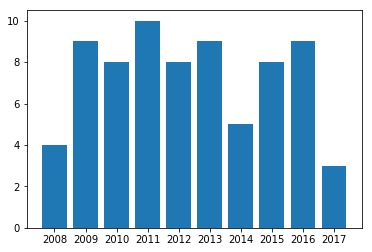

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

names = list(dictionary.keys())
values = list(dictionary.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(dictionary)),values,tick_label=names)
plt.show()

In [20]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

data = [go.Bar(
            x=names,
            y=values,
            marker=dict(color='#FF0000'), 
            name="Wins",
            
    )]
layout = go.Layout(
    showlegend=False,
    xaxis=dict(tickangle=-45,tickmode='linear',title='Year', titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        )),title='Season Wise Wins',   
         yaxis=dict(
        title='Number Of Wins',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
)
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='style-bar')

<b>Let us see RCB performance in and away from home Did it had a huge impact on their success Let us Find Out..</b>

In [21]:
wins=df[df.winner=='RCB']  
wins_At_home=wins[wins.city=='Bangalore']
count_home=len(wins_At_home)

In [22]:
wins_away=wins[wins.city!='Bangalore']
count_away=len(wins_away)

In [23]:

labels = ['Home Wins','Away Wins']
values = [count_home,count_away]
trace = go.Pie(labels=labels, values=values)
iplot([trace], filename='basic_pie_chart',show_link=False)

<b>Of all the matches RCB won there 59% wins were from away games <br>Now Let us see toss dependency on RCB success</b>

In [26]:
toss_wins_match=wins[wins.toss_winner=='RCB']
len(toss_wins_match)

35

In [27]:
loss_wins_match=wins[wins.toss_winner!='RCB']
len(loss_wins_match)

38

<b>Toss doesnot matter much for RCB. They have won 35 matches when the won the toss and 38 while losing the toss</b>

In [28]:
matches_won_batting_first=wins[wins.win_by_runs>0]
batting_first=len(matches_won_batting_first)
matches_won_chasing=wins[wins.win_by_wickets>0]
batting_second=len(matches_won_chasing)

In [29]:
print(batting_first)
print(batting_second)

30
42


<b>So RCB has won 30 matches batting first and 42 matches while chasing. Let us see what happened in last 4 seasons</b>

In [30]:
wins_season_2014=wins[wins.season==2014]
wins_season_2015=wins[wins.season==2015]
wins_season_2016=wins[wins.season==2016]
wins_season_2017=wins[wins.season==2017]
wins_last_4_seasons=pd.concat([wins_season_2014,wins_season_2015,wins_season_2016,wins_season_2017])

In [31]:
matches_won_batting_first=wins_last_4_seasons[wins_last_4_seasons.win_by_runs>0]
batting_first=len(matches_won_batting_first)
matches_won_chasing=wins_last_4_seasons[wins_last_4_seasons.win_by_wickets>0]
batting_second=len(matches_won_chasing)

In [32]:
print(batting_first)
print(batting_second)

12
13


<b>In last four seasons RCB has won 13 matches while chasing and 12 while batting first. So batting first or second didnot matter much in RCB success</b>

In [33]:
man_of_the_match=wins_last_4_seasons['player_of_match'].value_counts()

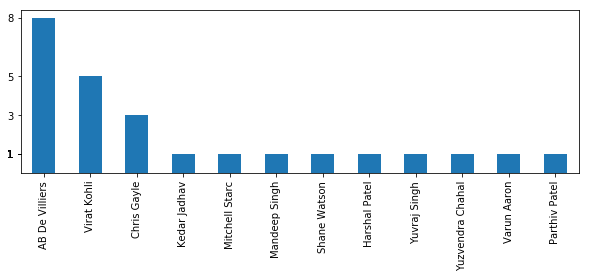

In [34]:
man_of_the_match.plot.bar(figsize=(10,3),xticks=man_of_the_match,yticks=man_of_the_match)
plt.show()

In [35]:
man_of_the_match_overall=wins['player_of_match'].value_counts()

In [36]:
man_of_the_match_overall

Chris Gayle         17
AB De Villiers      13
Virat Kohli         10
Jacques Kallis       5
Vinay Kumar          3
Yuvraj Singh         2
Kevin Pietersen      2
Manish Pandey        2
Ross Taylor          2
Anil Kumble          2
Mark Boucher         2
Praveen Kumar        1
Mandeep Singh        1
Robin Uthappa        1
Harshal Patel        1
Rahul Dravid         1
Parthiv Patel        1
Yuzvendra Chahal     1
Kedar Jadhav         1
Shane Watson         1
Sreenath Aravind     1
Mitchell Starc       1
Jaydev Unadkat       1
Varun Aaron          1
Name: player_of_match, dtype: int64

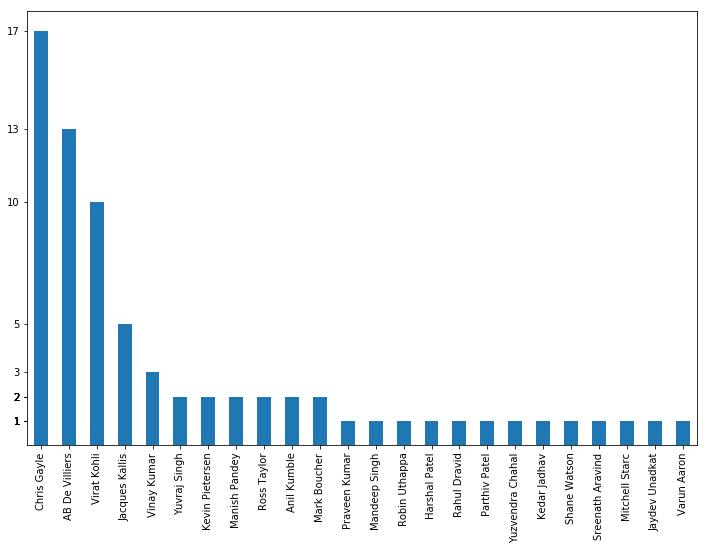

In [37]:
man_of_the_match_overall.plot.bar(figsize=(12,8),xticks=man_of_the_match_overall,yticks=man_of_the_match_overall)
plt.show()

<b>The Previous two graphs shows RCB dependency on their Three batsman Chris Gayle, AB Devilleres and Virat Kohli. Other than them there were not too many match winners specially in last 4 seasons and after dropping Gayle they are left with two. You cannot win games with just two players.</b>

<b>Let us look at RCB performance against different teams</b>

In [38]:
wins['team1_id'].unique()

array(['RCB', 'MI', 'DC', 'KKR', 'CSK', 'DD', 'KXI', 'RR', 'KTK', 'PW',
       'SRH', 'RPS', 'GL'], dtype=object)

In [39]:
csk_loss=len(wins[(wins.team1_id =='CSK') | (wins.team2_id=='CSK')]) 
mi_loss=len(wins[(wins.team1_id =='MI') | (wins.team2_id=='MI')]) 
kxi_loss=len(wins[(wins.team1_id =='KXI') | (wins.team2_id=='KXI')])
dd_loss=len(wins[(wins.team1_id =='DD') | (wins.team2_id=='DD')])
rr_loss=len(wins[(wins.team1_id =='RR') | (wins.team2_id=='RR')])
dc_loss=len(wins[(wins.team1_id =='DC') | (wins.team2_id=='DC')])
kkr_loss=len(wins[(wins.team1_id =='KKR') | (wins.team2_id=='KKR')])
srh_loss=len(wins[(wins.team1_id =='SRH') | (wins.team2_id=='SRH')])
teams_loss=[csk_loss,mi_loss,kxi_loss,dd_loss,rr_loss,dc_loss,kkr_loss,srh_loss]
labelss=['CSK','MI','KXI','DD','RR','DC','KKR','SRH']

In [40]:


data = [go.Bar(
            x=labelss,
            y=teams_loss,
            marker=dict(color=['#F9F606','#0983FC','#FB5304','#4404FB','#FB04D9','#0939FA','#000000','#FA9B09']), 
            name="Wins",            
    )]
layout = go.Layout(
    showlegend=False,
    xaxis=dict(tickangle=-45,tickmode='linear',title='Teams', titlefont=dict(
            size=16,
        
        )),title='RCB vs Different teams',   
         yaxis=dict(
        title='Number Of Wins',
        titlefont=dict(
            size=16
        ),
        tickfont=dict(
            size=14
        )
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='style-bar',show_link=False)

<b>It would be better if instead of number of wins we used win percentage</b>

In [41]:
csk_matches=len(df[(df.team1_id =='CSK') | (df.team2_id=='CSK')]) 
mi_matches=len(df[(df.team1_id =='MI') | (df.team2_id=='MI')]) 
kxi_matches=len(df[(df.team1_id =='KXI') | (df.team2_id=='KXI')])
dd_matches=len(df[(df.team1_id =='DD') | (df.team2_id=='DD')])
rr_matches=len(df[(df.team1_id =='RR') | (df.team2_id=='RR')])
dc_matches=len(df[(df.team1_id =='DC') | (df.team2_id=='DC')])
kkr_matches=len(df[(df.team1_id =='KKR') | (df.team2_id=='KKR')])
srh_matches=len(df[(df.team1_id =='SRH') | (df.team2_id=='SRH')])
teams_matches=[csk_matches,mi_matches,kxi_matches,dd_matches,rr_matches,dc_matches,kkr_matches,srh_matches]
labelss=['CSK','MI','KXI','DD','RR','DC','KKR','SRH']

In [42]:
res_list = [teams_loss[i]/teams_matches[i]*100 for i in range(len(teams_matches))]

In [43]:
data = [go.Bar(
            x=labelss,
            y=res_list,
            marker=dict(color=['#F9F606','#0983FC','#FB5304','#4404FB','#FB04D9','#0939FA','#000000','#FA9B09']), 
            name="Wins",            
    )]
layout = go.Layout(
    showlegend=False,
    xaxis=dict(tickangle=-45,tickmode='linear',title='Teams', titlefont=dict(
            size=16,
        
        )),title='RCB vs Different teams',   
         yaxis=dict(
        title='Win percentage',
        titlefont=dict(
            size=16
        ),
        tickfont=dict(
            size=14
        )
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='style-bar',show_link=False)

This gives a better insight of RCB performance against different teams we can see RCB has won 62 % games against DD and have lowest success rate against CSK

Let us look at the close matches RCB lost

In [44]:
len(df[(df.win_by_runs>0) & (df.win_by_runs<10) & (df.winner!='RCB')] )

5

<b>There have been 5 matches where RCB lost by less than 10 runs</b>

This was the maximum info we could get from this dataset. We have another dataset which has ball by ball observation we will perform analysis on this data set and later merge the datasets

In [45]:
df_ball_by_ball=pd.read_csv('E:/Hacka/train (1)/train/ball_by_ball_data.csv') # reading data

In [46]:
df_ball_by_ball.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,batsman_id,non_striker,non_striker_id,bowler,bowler_id,batsman_runs,extra_runs,player_dismissed,player_dismissed_id,dismissal_kind,is_super_over
0,2017_1,1,SRH,RCB,1,1,David Warner,207,Shikhar Dhawan,57,Tymal Mills,621,0,0,NaN,NaN,NaN,0
1,2017_1,1,SRH,RCB,1,2,David Warner,207,Shikhar Dhawan,57,Tymal Mills,621,0,0,NaN,NaN,NaN,0
2,2017_1,1,SRH,RCB,1,3,David Warner,207,Shikhar Dhawan,57,Tymal Mills,621,4,0,NaN,NaN,NaN,0
3,2017_1,1,SRH,RCB,1,4,David Warner,207,Shikhar Dhawan,57,Tymal Mills,621,0,0,NaN,NaN,NaN,0
4,2017_1,1,SRH,RCB,1,5,David Warner,207,Shikhar Dhawan,57,Tymal Mills,621,0,2,NaN,NaN,NaN,0


<b>First let us extract all the matches played by RCB</b>

In [47]:
rcb_matches=df_ball_by_ball[(df_ball_by_ball.batting_team =='RCB') | (df_ball_by_ball.bowling_team=='RCB')]

In [48]:
rcb_matches.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,batsman_id,non_striker,non_striker_id,bowler,bowler_id,batsman_runs,extra_runs,player_dismissed,player_dismissed_id,dismissal_kind,is_super_over
0,2017_1,1,SRH,RCB,1,1,David Warner,207,Shikhar Dhawan,57,Tymal Mills,621,0,0,NaN,NaN,NaN,0
1,2017_1,1,SRH,RCB,1,2,David Warner,207,Shikhar Dhawan,57,Tymal Mills,621,0,0,NaN,NaN,NaN,0
2,2017_1,1,SRH,RCB,1,3,David Warner,207,Shikhar Dhawan,57,Tymal Mills,621,4,0,NaN,NaN,NaN,0
3,2017_1,1,SRH,RCB,1,4,David Warner,207,Shikhar Dhawan,57,Tymal Mills,621,0,0,NaN,NaN,NaN,0
4,2017_1,1,SRH,RCB,1,5,David Warner,207,Shikhar Dhawan,57,Tymal Mills,621,0,2,NaN,NaN,NaN,0


In [49]:
#total_matches_rcb_played
unique_matches=rcb_matches['match_id'].unique()
#Total 152 matches played by RCB

In [50]:
unique_matches

array(['2017_1', '2017_5', '2017_8', '2017_12', '2017_17', '2017_20',
       '2017_27', '2017_30', '2017_33', '2017_37', '2017_42', '2017_45',
       '2017_55', '2008_1', '2008_4', '2008_11', '2008_15', '2008_17',
       '2008_21', '2008_25', '2008_29', '2008_31', '2008_35', '2008_42',
       '2008_45', '2008_48', '2008_52', '2009_2', '2009_5', '2009_7',
       '2009_10', '2009_12', '2009_17', '2009_22', '2009_26', '2009_31',
       '2009_36', '2009_39', '2009_42', '2009_50', '2009_54', '2009_56',
       '2009_57', '2010_4', '2010_7', '2010_10', '2010_14', '2010_18',
       '2010_23', '2010_28', '2010_31', '2010_35', '2010_40', '2010_43',
       '2010_46', '2010_49', '2010_52', '2010_57', '2010_59', '2011_3',
       '2011_8', '2011_11', '2011_14', '2011_24', '2011_29', '2011_34',
       '2011_46', '2011_49', '2011_54', '2011_57', '2011_62', '2011_68',
       '2011_70', '2011_72', '2011_73', '2012_5', '2012_10', '2012_13',
       '2012_19', '2012_22', '2012_26', '2012_31', '2012_37', '2

These are all ids of all the matches RCB played. We will perform analysis on all the balls and will perform analysis on these balls.